In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv, copy, glob, math
from matplotlib.pyplot import gca
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.ticker
from decimal import Decimal


plt.rc('text',usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams["axes.labelsize"]=30
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["ytick.labelsize"]=20
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["legend.fontsize"]=20
plt.rcParams["legend.frameon"]=False

In [2]:
def SIRFileName(size, a1, a2):
    N_str = "{:.1e}".format(size)
    a1_str = "{:.2f}".format(a1)
    a2_str = "{:.2f}".format(a2)
    return "N="+N_str+",a1="+a1_str+",a2="+a2_str+".txt"

def SEIRFileName(size, a1, a2, a3, a4):
    N_str = "{:.1e}".format(size)
    a1_str = "{:.2f}".format(a1)
    a2_str = "{:.2f}".format(a2)
    a3_str = "{:.2f}".format(a3)
    a4_str = "{:.2f}".format(a4)
    return "N="+N_str+",a1="+a1_str+",a2="+a2_str+",a3="+a3_str+",a4="+a4_str+".txt"
    
def SJHFileName(meanDegree, a1, a2, honest, inspectionPeriod, trace, meanIncubation, devIncubation):
    m_str = str(meanDegree)
    a1_str = "{:.2f}".format(a1)
    a2_str = "{:.2f}".format(a2)
    honest_str = "{:.2f}".format(honest)
    inspection_str = str(inspectionPeriod)
    trace_str = "{:.2f}".format(trace)
    meanIncubation_str = "{:.2f}".format(meanIncubation)
    devIncubation_str = "{:.2f}".format(devIncubation)
    return "m="+m_str+",a1="+a1_str+",a2="+a2_str+",h="+honest_str+",iP="+inspection_str+",tP="+trace_str+",mi="+meanIncubation_str+",di="+devIncubation_str+".txt"

def KQFileName(meanDegree, a1, a2, infectious, sick, recovery):
    m_str = str(meanDegree)
    a1_str = "{:.2f}".format(a1)
    a2_str = "{:.2f}".format(a2)
    infectious_str = "{:.2f}".format(infectious)
    sick_str = "{:.2f}".format(sick)
    recovery_str = "{:.2f}".format(recovery)
    return "m="+m_str+",a1="+a1_str+",a2="+a2_str+",i="+infectious_str+",s="+sick_str+",r="+recovery_str+".txt"

def KQTFileName(temporalRatio, meanDegree, a1, a2, infectious, sick, recovery):
    t_str = "{:.2f}".format(temporalRatio)
    m_str = str(meanDegree)
    a1_str = "{:.2f}".format(a1)
    a2_str = "{:.2f}".format(a2)
    infectious_str = "{:.2f}".format(infectious)
    sick_str = "{:.2f}".format(sick)
    recovery_str = "{:.2f}".format(recovery)
    return "t="+t_str+",m="+m_str+",a1="+a1_str+",a2="+a2_str+",i="+infectious_str+",s="+sick_str+",r="+recovery_str+".txt"

def KQFileName2(meanDegree, a1, a2, infectiousA, infectiousI, sick, recoveryA, recoveryI):
    m_str = str(meanDegree)
    a1_str = "{:.2f}".format(a1)
    a2_str = "{:.2f}".format(a2)
    infectiousA_str = "{:.2f}".format(infectiousA)
    infectiousI_str = "{:.2f}".format(infectiousI)
    sick_str = "{:.2f}".format(sick)
    recoveryA_str = "{:.2f}".format(recoveryA)
    recoveryI_str = "{:.2f}".format(recoveryI)
    return "m="+m_str+",a1="+a1_str+",a2="+a2_str+",iA="+infectiousA_str+",iI="+infectiousI_str+",s="+sick_str+",rA="+recoveryA_str+",rI="+recoveryI_str+".txt"


    
def readSIR(network, kind, size, a1, a2):
    filename = "./data/SIR_"+network+"/"+kind+"/"+SIRFileName(size, a1, a2)
    time = []
    S = []
    I = []
    R = []
    with open(filename) as file:
        for line in csv.reader(file):
            time.append(float(line[0]))
            S.append(float(line[1]))
            I.append(float(line[2]))
            R.append(float(line[3]))
    return np.array(time), np.array(S), np.array(I), np.array(R)


def readSEIR(network, kind, size, a1, a2, a3, a4):
    filename="./data/SEIR_"+network+"/"+kind+"/"+SEIRFileName(size, a1, a2, a3, a4)
    time=[]
    S=[]
    E=[]
    I=[]
    R=[]
    with open(filename) as file:
        for line in csv.reader(file):
            time.append(float(line[0]))
            S.append(float(line[1]))
            E.append(float(line[2]))
            I.append(float(line[3]))
            R.append(float(line[4]))
    return np.array(time), np.array(S), np.array(E), np.array(I), np.array(R)

def readSJH_G(meanDegree, a1, a2, honest, inspectionPeriod, trace, meanIncubation, devIncubation):
    filename="./data/SWIR/SJH/gaussian/"+SJHFileName(meanDegree, a1, a2, honest, inspectionPeriod, trace, meanIncubation, devIncubation)
    time = []
    S = []
    W = []
    I = []
    QS = []
    QW = []
    QI = []
    R = []
    with open(filename) as file:
        for line in csv.reader(file):
            time.append(float(line[0]))
            S.append(float(line[1]))
            W.append(float(line[2]))
            I.append(float(line[3]))
            QS.append(float(line[4]))
            QW.append(float(line[5]))
            QI.append(float(line[6]))
            R.append(float(line[7]))
    return np.array(time), np.array(S), np.array(I), np.array(W), np.array(QS), np.array(QI), np.array(QW), np.array(R)     

def readSJH_C(meanDegree, a1, a2, honest, inspectionPeriod, trace, meanIncubation, devIncubation):
    filename="./data/SWIR/SJH/cauchy/"+SJHFileName(meanDegree, a1, a2, honest, inspectionPeriod, trace, meanIncubation, devIncubation)
    time = []
    S = []
    W = []
    I = []
    QS = []
    QW = []
    QI = []
    R = []
    with open(filename) as file:
        for line in csv.reader(file):
            time.append(float(line[0]))
            S.append(float(line[1]))
            W.append(float(line[2]))
            I.append(float(line[3]))
            QS.append(float(line[4]))
            QW.append(float(line[5]))
            QI.append(float(line[6]))
            R.append(float(line[7]))
    return np.array(time), np.array(S), np.array(I), np.array(W), np.array(QS), np.array(QI), np.array(QW), np.array(R)    

def readSJH_P(meanDegree, a1, a2, honest, inspectionPeriod, trace, meanIncubation, devIncubation):
    filename="./data/SWIR/SJH/power/"+SJHFileName(meanDegree, a1, a2, honest, inspectionPeriod, trace, meanIncubation, devIncubation)
    time = []
    S = []
    W = []
    I = []
    QS = []
    QW = []
    QI = []
    R = []
    with open(filename) as file:
        for line in csv.reader(file):
            time.append(float(line[0]))
            S.append(float(line[1]))
            W.append(float(line[2]))
            I.append(float(line[3]))
            QS.append(float(line[4]))
            QW.append(float(line[5]))
            QI.append(float(line[6]))
            R.append(float(line[7]))
    return np.array(time), np.array(S), np.array(I), np.array(W), np.array(QS), np.array(QI), np.array(QW), np.array(R)    

def readKquarantine(kind, meanDegree, a1, a2, infectious, sick, recovery):
    filename="./data/Kquarantine/"+kind+"/"+KQFileName(meanDegree, a1, a2, infectious, sick, recovery)
    S = []
    QS = []
    E = []
    QE = []
    I = []
    QI = []
    A = []
    QA = []
    R = []
    QR = []
    with open(filename) as file:
        for line in csv.reader(file):
            S.append(float(line[0]))
            QS.append(float(line[1]))
            E.append(float(line[2]))
            QE.append(float(line[3]))
            I.append(float(line[4]))
            QI.append(float(line[5]))
            A.append(float(line[6]))
            QA.append(float(line[7]))
            R.append(float(line[8]))
            QR.append(float(line[9]))
    return np.array(S),np.array(QS),np.array(E),np.array(QE),np.array(I),np.array(QI),np.array(A),np.array(QA),np.array(R),np.array(QR)

def readKquarantine2(kind, meanDegree, a1, a2, infectiousA, infectiousI, sick, recoveryA, recoveryI):
    filename="./data/Kquarantine/"+kind+"/"+KQFileName2(meanDegree, a1, a2, infectiousA, infectiousI, sick, recoveryA, recoveryI)
    S = []
    QS = []
    E = []
    QE = []
    I = []
    QI = []
    A = []
    QA = []
    R = []
    QR = []
    CR = []
    with open(filename) as file:
        for line in csv.reader(file):
            S.append(float(line[0]))
            QS.append(float(line[1]))
            E.append(float(line[2]))
            QE.append(float(line[3]))
            I.append(float(line[4]))
            QI.append(float(line[5]))
            A.append(float(line[6]))
            QA.append(float(line[7]))
            R.append(float(line[8]))
            QR.append(float(line[9]))
            CR.append(float(line[10]))
    return np.array(S),np.array(QS),np.array(E),np.array(QE),np.array(I),np.array(QI),np.array(A),np.array(QA),np.array(R),np.array(QR),np.array(CR)

def readKquarantine0(kind, infectiousProb, quarantineProb, temporal = 0, randomEngineSeed = -1):
    if temporal:
        filename = "./data/Kquarantine/T"+kind+"/IP{:.2f}".format(infectiousProb)+",QP{:.2f}".format(quarantineProb)+",T{:.2f}".format(temporal)+",S"+str(randomEngineSeed)+".txt"
    else:
        filename = "./data/Kquarantine/"+kind+"/IP{:.2f}".format(infectiousProb)+",QP{:.2f}".format(quarantineProb)+",S"+str(randomEngineSeed)+".txt"
    S = []
    QS = []
    E = []
    QE = []
    I = []
    QI = []
    A = []
    QA = []
    R = []
    QR = []
    CR = []
    with open(filename) as file:
        for line in csv.reader(file):
            S.append(float(line[0]))
            QS.append(float(line[1]))
            E.append(float(line[2]))
            QE.append(float(line[3]))
            I.append(float(line[4]))
            QI.append(float(line[5]))
            A.append(float(line[6]))
            QA.append(float(line[7]))
            R.append(float(line[8]))
            QR.append(float(line[9]))
            CR.append(float(line[10]))
    return np.array(S),np.array(QS),np.array(E),np.array(QE),np.array(I),np.array(QI),np.array(A),np.array(QA),np.array(R),np.array(QR),np.array(CR)

def readTKquarantine(kind, temporalRatio, meanDegree, a1, a2, infectious, sick, recovery):
    filename="./data/Kquarantine/"+kind+"/"+KQTFileName(temporalRatio, meanDegree, a1, a2, infectious, sick, recovery)
    S = []
    QS = []
    E = []
    QE = []
    I = []
    QI = []
    A = []
    QA = []
    R = []
    QR = []
    with open(filename) as file:
        for line in csv.reader(file):
            S.append(float(line[0]))
            QS.append(float(line[1]))
            E.append(float(line[2]))
            QE.append(float(line[3]))
            I.append(float(line[4]))
            QI.append(float(line[5]))
            A.append(float(line[6]))
            QA.append(float(line[7]))
            R.append(float(line[8]))
            QR.append(float(line[9]))
    return np.array(S),np.array(QS),np.array(E),np.array(QE),np.array(I),np.array(QI),np.array(A),np.array(QA),np.array(R),np.array(QR)


def readKQOrderParameter(temporal=0):
    if temporal:
        filename = "./data/Kquarantine/TER_DT/orderParameter.txt"
    else:
        filename = "./data/Kquarantine/ER_DT/orderParameter1.txt"
    CR = np.ones((101,101))*0.37*1e-4
    with open(filename) as file:
        for line in csv.reader(file):
            CR[int(Decimal(line[0])*100)][int(Decimal(line[1])*100)] = Decimal(line[2])
    
    return CR

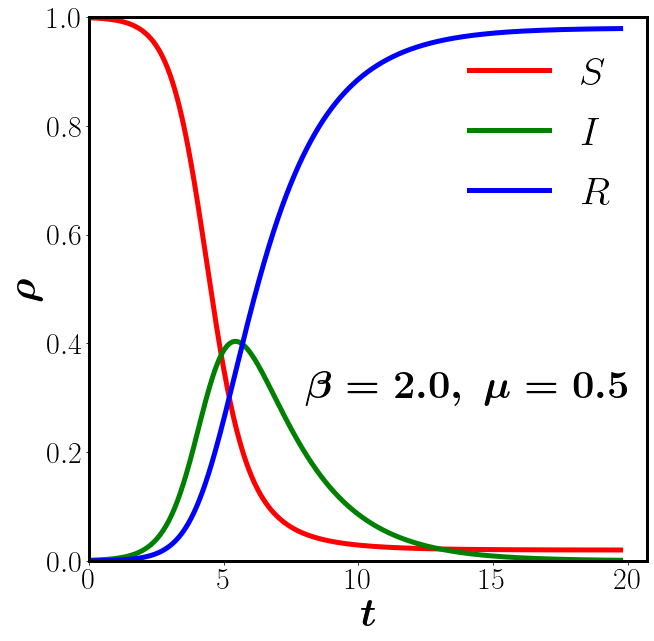

In [41]:
fig,ax = plt.subplots(figsize = (10,10))
# plt.tight_layout()
plt.setp(ax.spines.values(), linewidth = 3)


N = 1e3
a1 = 0.5
a2 = 1

def readSIR():
    filename = "../data/COVID/SIR/RR/RK4/N1.0e+03,M10,SIII0.20,IR0.50-0.txt"
    time = []
    S = []
    I = []
    R = []
    with open(filename) as file:
        for line in csv.reader(file):
            time.append(float(line[0]))
            S.append(float(line[1]))
            I.append(float(line[2]))
            R.append(float(line[3]))
    return np.array(time), np.array(S), np.array(I), np.array(R)

t,S,I,R = readSIR()
ax.plot(t, S, 'r-', label = '$S$', linewidth = 5)
ax.plot(t, I, 'g-', label = '$I$', linewidth = 5)
ax.plot(t, R, 'b-', label = '$R$', linewidth = 5)

ax.text(8, 0.3, r"$\boldsymbol{\beta=2.0,\ \mu=0.5}$", fontsize=40)

# t,S,I,R = readSIR("RR", "GA", N, a1, a2)
# ax.plot(t, S, 'r:', label = 'S(RR,GA)')
# ax.plot(t, I, 'g:', label = 'I(RR,GA)')
# ax.plot(t, R, 'b:', label = 'R(RR,GA)')

# t,S,I,R = readSIR("ER", "GA", N, a1, a2)
# ax.plot(t, S, 'r--', label = 'S(ER,GA)')
# ax.plot(t, I, 'g--', label = 'I(ER,GA)')
# ax.plot(t, R, 'b--', label = 'R(ER,GA)')


ax.set_xticks([0,5,10,15,20])
ax.legend(loc="upper right", fontsize=40)
ax.set_ylim([0,1])
ax.set_xlim(left=0)
ax.set_xlabel(r"$\boldsymbol{t}$", fontsize=40)
ax.set_ylabel(r"$\boldsymbol{\rho}$", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# plt.savefig("./figure/SIR,N=1e3,k=10.pdf")
plt.savefig("SIR.pdf")
plt.show()

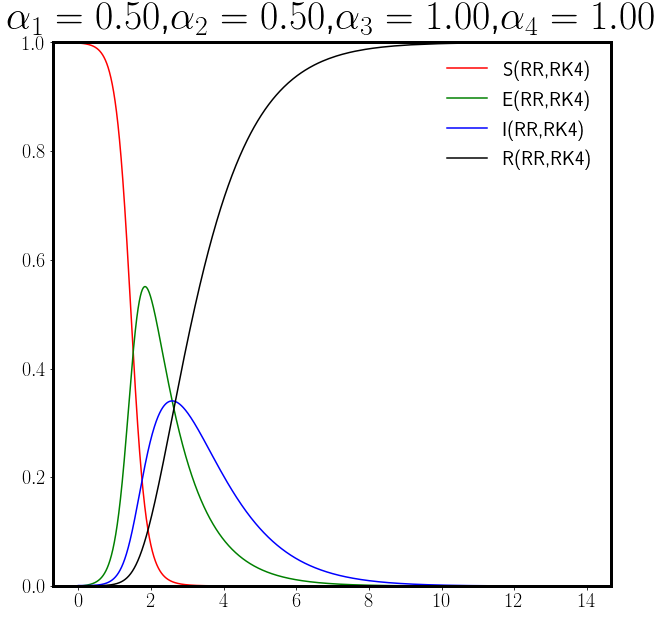

In [35]:
fig,ax=plt.subplots(figsize=(10,10))
plt.setp(ax.spines.values(), linewidth=3)

N = 1e3
a1 = 0.5
a2 = a1
a3 = 1
a4 = 1

deltaT=1e-3
t, S,E,I,R=readSEIR("RR","RK4", N, a1, a2, a3, a4)

ax.plot(t, S, 'r-', label='S(RR,RK4)')
ax.plot(t, E, 'g-', label='E(RR,RK4)')
ax.plot(t, I, 'b-', label='I(RR,RK4)')
ax.plot(t, R, 'k-', label='R(RR,RK4)')
ax.set_ylim([0,1])
ax.legend(loc="upper right")

plt.title(r"$\alpha_1={:.2f}$".format(a1)+r",$\alpha_2={:.2f}$".format(a2)+r",$\alpha_3={:.2f}$".format(a3)+r",$\alpha_4={:.2f}$".format(a4), fontsize=40)


plt.savefig("./figure/SEIR,N=1e3,k=10.pdf")
plt.show()

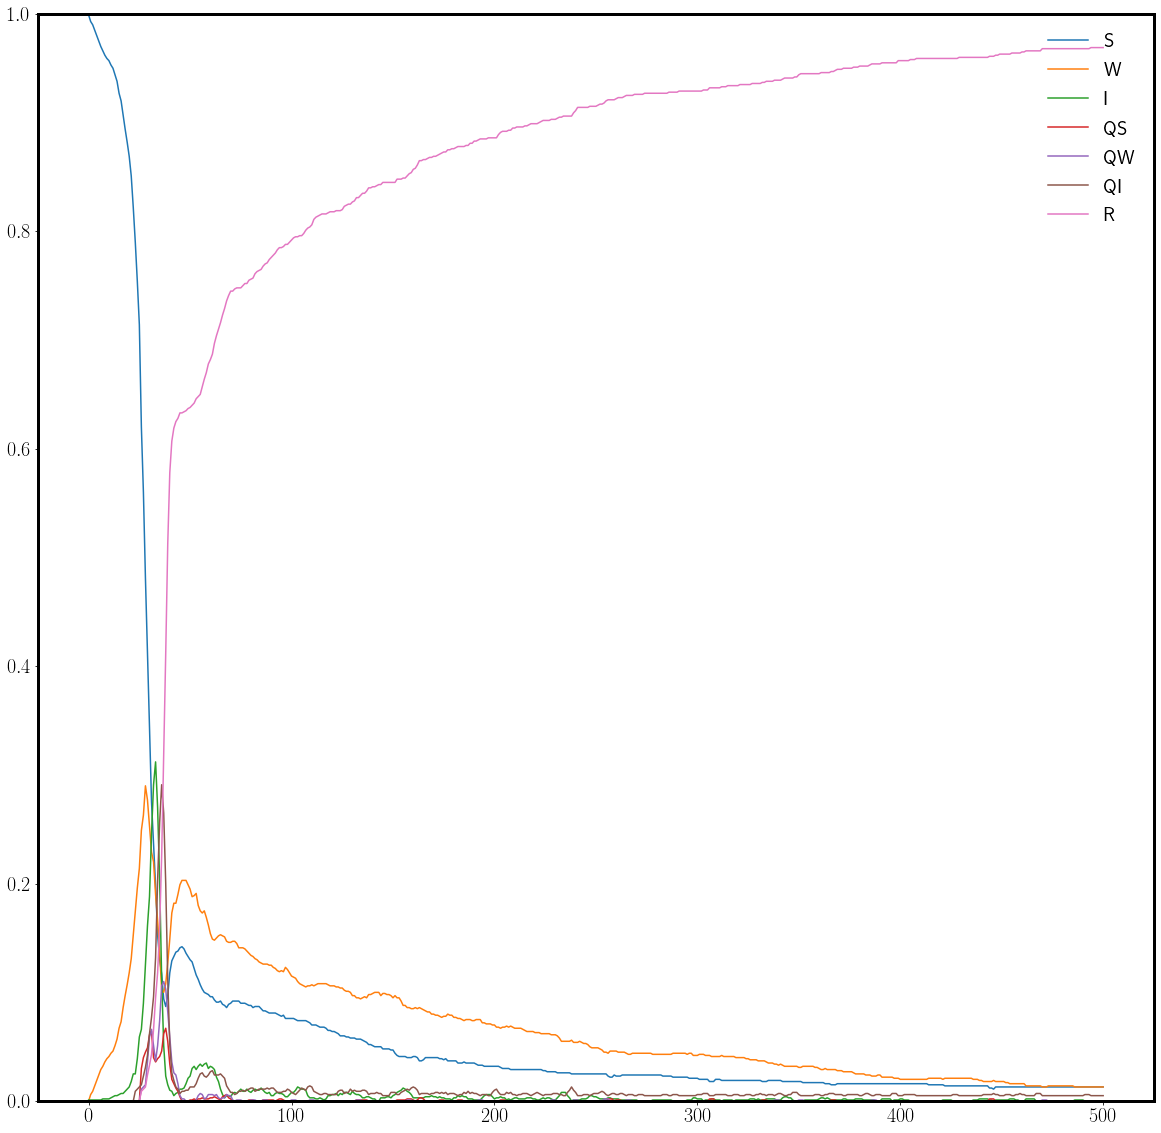

In [20]:
fig,ax=plt.subplots(figsize=(20,20))
plt.setp(ax.spines.values(), linewidth=3)

N = 1e3
a1 = 0.4
a2 = 0.4

# deltaT=1e-3
t, S,I,W,QS,QI,QW,R=read()
S/=N
I/=N
W/=N
QS/=N
QI/=N
QW/=N
R/=N


ax.plot(t, S, label='S')
ax.plot(t, W, label='W')
ax.plot(t, I, label='I')
ax.plot(t, QS, label='QS')
ax.plot(t, QW, label='QW')
ax.plot(t, QI, label='QI')
ax.plot(t, R, label='R')


ax.set_ylim([0,1])
ax.legend(loc="upper right")



plt.show()

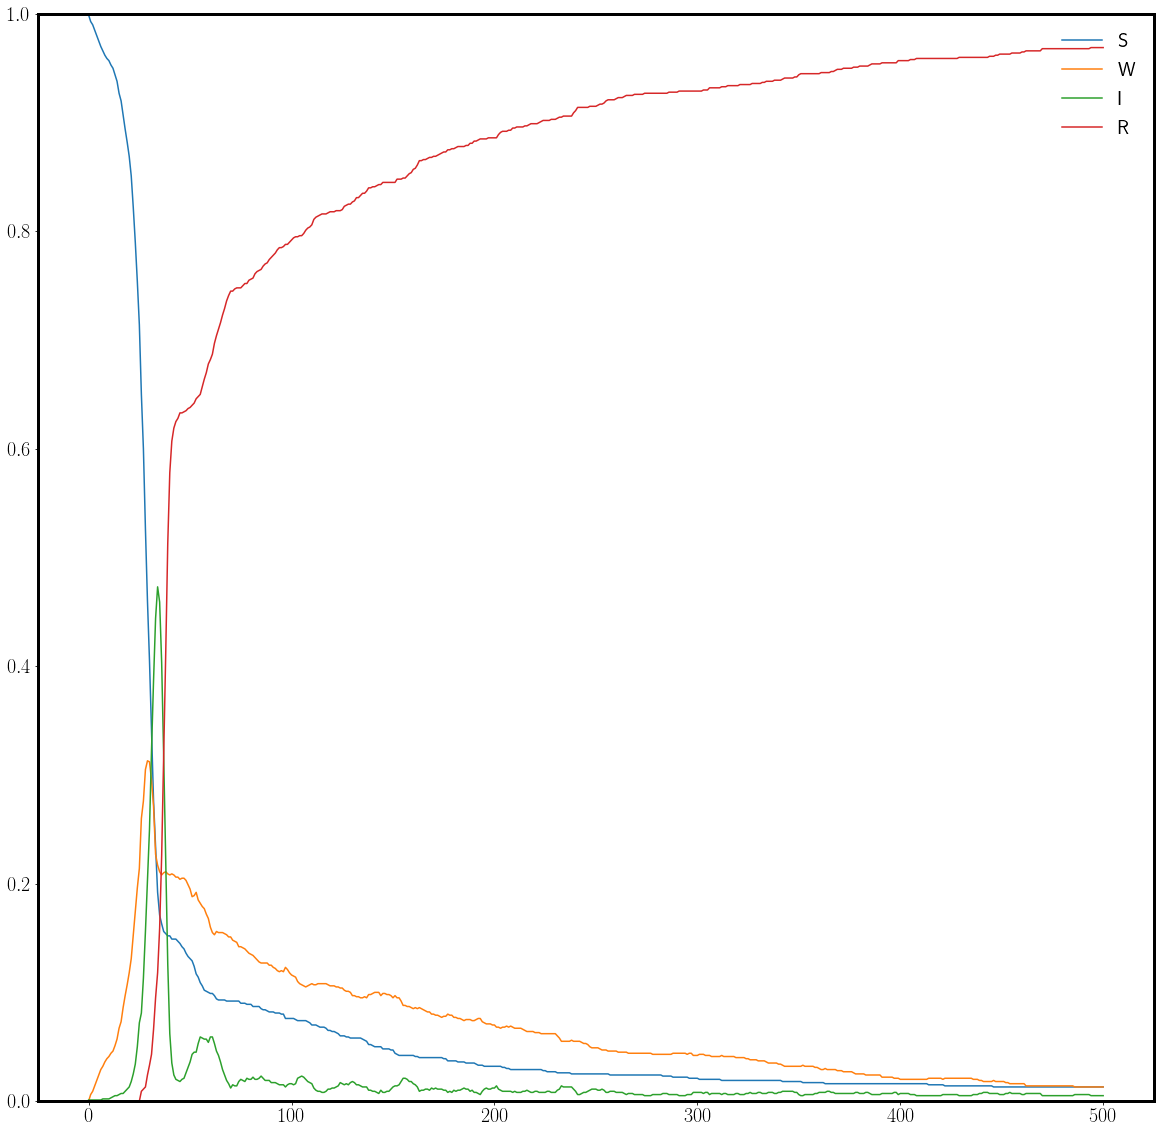

In [19]:
fig,ax=plt.subplots(figsize=(20,20))
plt.setp(ax.spines.values(), linewidth=3)

N = 1e3
a1 = 0.4
a2 = 0.4

# deltaT=1e-3
t, S,I,W,QS,QI,QW,R=read()
S/=N
I/=N
W/=N
QS/=N
QI/=N
QW/=N
R/=N
S+=QS
I+=QI
W+=QW


ax.plot(t, S, label='S')
ax.plot(t, W, label='W')
ax.plot(t, I, label='I')
ax.plot(t, R, label='R')


ax.set_ylim([0,1])
ax.legend(loc="upper right")



plt.show()

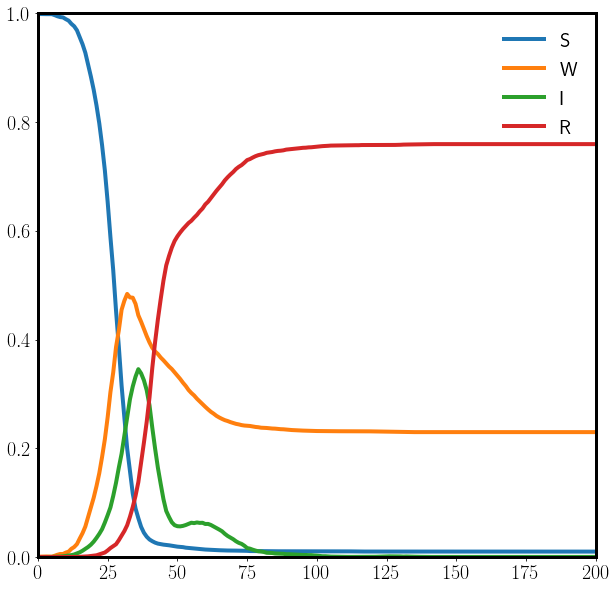

In [212]:
fig,ax=plt.subplots(figsize=(10,10))
plt.setp(ax.spines.values(), linewidth=3)

alpha1, alpha2= 0.9, 0.1

meanDegree = 6
honestThreshold = 1
inspectionPeriod = 3
traceProb = 0.9
meanIncubation = 5
devIncubation = 2


t,S,I,W,QS,QI,QW,R=readSJH_G(meanDegree, alpha1, alpha2, honestThreshold, inspectionPeriod, traceProb, meanIncubation, devIncubation)

# ax.plot(t, S, label='S', linewidth = 4)
# ax.plot(t, W, label='W', linewidth = 4)
# ax.plot(t, I, label='I', linewidth = 4)
# ax.plot(t, QS, label='QS', linewidth = 4)
# ax.plot(t, QW, label='QW', linewidth = 4)
# ax.plot(t, QI, label='QI', linewidth = 4)
# ax.plot(t, R, label='R', linewidth = 4)

ax.plot(t, S+QS, label='S', linewidth = 4)
ax.plot(t, W+QW, label='W', linewidth = 4)
ax.plot(t, I+QI, label='I', linewidth = 4)
ax.plot(t, R, label='R', linewidth = 4)



ax.set_ylim([0,1])
ax.set_xlim([0,t[-1]])
ax.set_xlim([0,200])
ax.legend(loc="upper right")
# plt.title("Gaussian")


plt.savefig("./figure/SWIR_G,a1=0.9,a2=0.1.pdf")
plt.show()

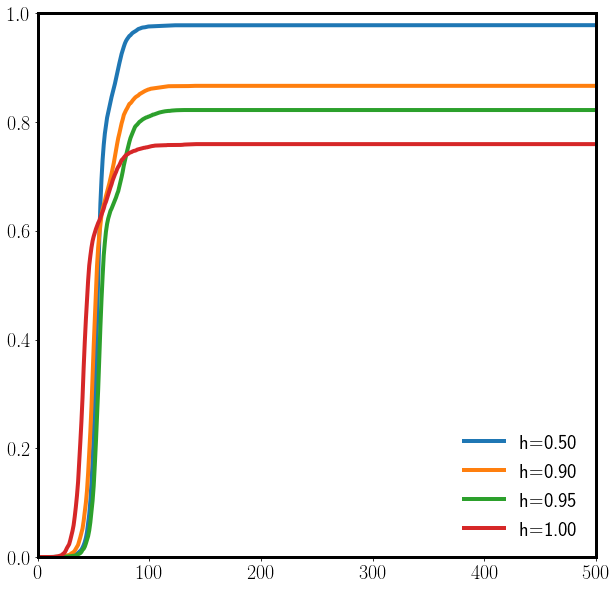

In [213]:
fig,ax=plt.subplots(figsize=(10,10))
plt.setp(ax.spines.values(), linewidth=3)

alpha1, alpha2= 0.9, 0.1

meanDegree = 6
honestThreshold = 0.95
inspectionPeriod = 3
traceProb = 0.9
meanIncubation = 5
devIncubation = 2


for honestThreshold in [0.5,0.9,0.95,1]:
    t,_,_,_,_,_,_,R = readSJH_G(meanDegree, alpha1, alpha2, honestThreshold, inspectionPeriod, traceProb, meanIncubation, devIncubation)
    ax.plot(t,R, linewidth=4, label='h={:.2f}'.format(honestThreshold))
    



ax.set_ylim([0,1])
ax.set_xlim([0,t[-1]])
ax.legend(loc="lower right")


plt.savefig("./figure/SWIR_G_hVarying.pdf")
plt.show()

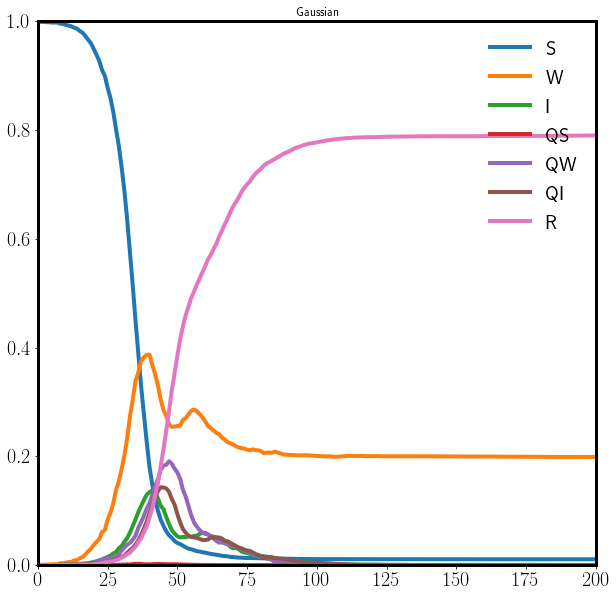

In [101]:
fig,ax=plt.subplots(figsize=(10,10))
plt.setp(ax.spines.values(), linewidth=3)

alpha1, alpha2 = 0.9,0.1


honestThreshold = 0.95
inspectionPeriod = 3
traceProb = 0.9
meanIncubation = 5
devIncubation = 2

meanDegree = 6

t,S,I,W,QS,QI,QW,R=readSJH_C(meanDegree, alpha1, alpha2, honestThreshold, inspectionPeriod, traceProb, meanIncubation, devIncubation)

ax.plot(t, S, label='S', linewidth = 4)
ax.plot(t, W, label='W', linewidth = 4)
ax.plot(t, I, label='I', linewidth = 4)
ax.plot(t, QS, label='QS', linewidth = 4)
ax.plot(t, QW, label='QW', linewidth = 4)
ax.plot(t, QI, label='QI', linewidth = 4)
ax.plot(t, R, label='R', linewidth = 4)


ax.set_ylim([0,1])
# ax.set_xlim([0,t[-1]])
ax.set_xlim([0,200])
ax.legend(loc="upper right")
plt.title("Gaussian")


plt.show()

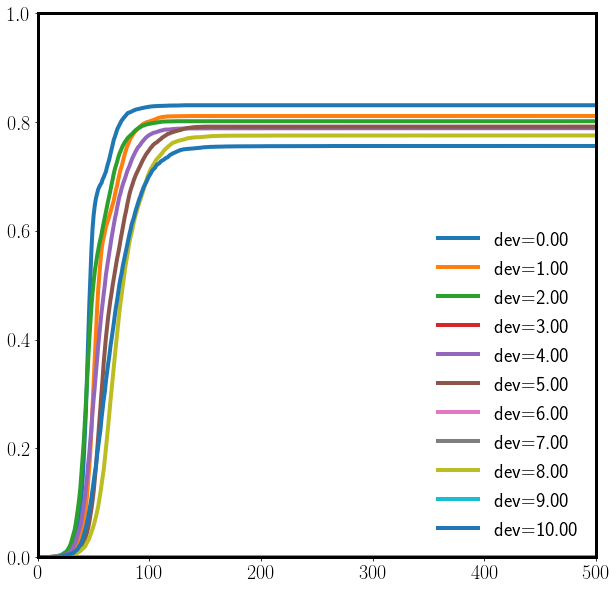

In [108]:
fig,ax=plt.subplots(figsize=(10,10))
plt.setp(ax.spines.values(), linewidth=3)

alpha1 = 0.9
alpha2 = 0.1
meanDegree = 6


honestThreshold = 0.95
inspectionPeriod = 3
traceProb = 0.9
meanIncubation = 5
devIncubation = 2

for devIncubation in np.linspace(0,10,11):
    t,_,_,_,_,_,_,R = readSJH_C(meanDegree, alpha1, alpha2, honestThreshold, inspectionPeriod, traceProb, meanIncubation, devIncubation)
    ax.plot(t,R, linewidth=4, label='dev={:.2f}'.format(devIncubation))


# t,_,_,_,_,_,_,R = readSJH_C(meanDegree, alpha1, alpha2, honestThreshold, inspectionPeriod, traceProb, meanIncubation, devIncubation)
# ax.plot(t,R, linewidth=4, label='cauchy')




ax.set_ylim([0,1])
ax.set_xlim([0,t[-1]])
ax.legend(loc="lower right")



plt.show()

In [4]:
devIncubationList=[0.14,0.4,0.65]
inspectionPeriodList=[1,2,3,4,5,6,7,8,9,10]
meanDegreeList=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
traceProbList=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

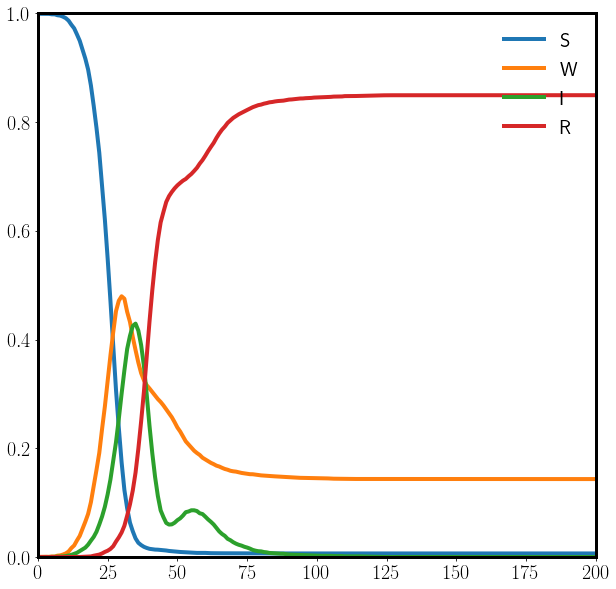

In [181]:
fig,ax=plt.subplots(figsize=(10,10))
plt.setp(ax.spines.values(), linewidth=3)


alpha1, alpha2= 0.9, 0.1

meanDegree = 6
honestThreshold = 0.95
inspectionPeriod = 3
traceProb = 0.9
meanIncubation = 14
devIncubation = 0.14



t,S,I,W,QS,QI,QW,R=readSJH_P(meanDegree, alpha1, alpha2, honestThreshold, inspectionPeriod, traceProb, meanIncubation, devIncubation)

# ax.plot(t, S, label='S', linewidth = 4)
# ax.plot(t, W, label='W', linewidth = 4)
# ax.plot(t, I, label='I', linewidth = 4)
# ax.plot(t, QS, label='QS', linewidth = 4)
# ax.plot(t, QW, label='QW', linewidth = 4)
# ax.plot(t, QI, label='QI', linewidth = 4)
# ax.plot(t, R, label='R', linewidth = 4)

ax.plot(t, S+QS, label='S', linewidth = 4)
ax.plot(t, W+QW, label='W', linewidth = 4)
ax.plot(t, I+QI, label='I', linewidth = 4)
ax.plot(t, R, label='R', linewidth = 4)



ax.set_ylim([0,1])
# ax.set_xlim([0,t[-1]])
ax.set_xlim([0,200])
ax.legend(loc="upper right")

plt.savefig("./figure/SWIR_P,a1=0.9,a2=0.1.pdf")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/SWIR/SJH/power/m=6,a1=0.90,a2=0.10,h=0.05,iP=3,tP=0.90,mi=14.00,di=0.65.txt'

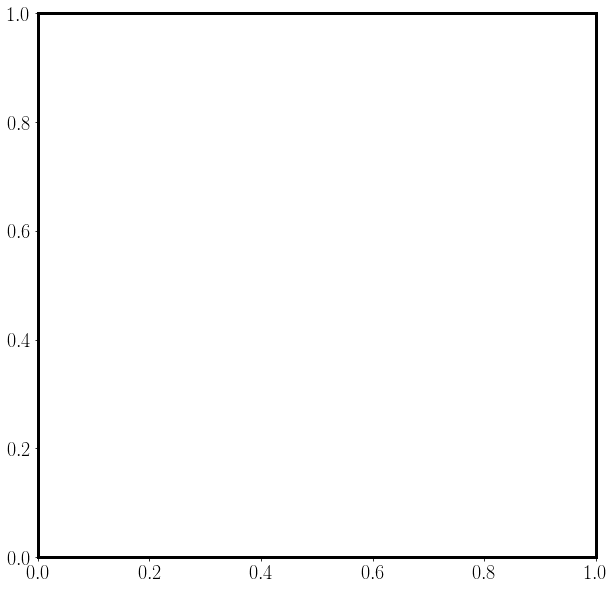

In [5]:
fig,ax=plt.subplots(figsize=(10,10))
plt.setp(ax.spines.values(), linewidth=3)

alpha1, alpha2= 0.9, 0.1

meanDegree = 6
honestThreshold = 0.95
inspectionPeriod = 3
traceProb = 0.9
meanIncubation = 14
devIncubation = 0.65




for honestThreshold in np.linspace(0.05,1,20):
    t,_,_,_,_,_,_,R = readSJH_P(meanDegree, alpha1, alpha2, honestThreshold, inspectionPeriod, traceProb, meanIncubation, devIncubation)
    ax.plot(t,R, linewidth=4, label='exponent={:.2f}'.format(devIncubation))


ax.set_ylim([0,1])
ax.set_xlim([0,t[-1]])
ax.legend(loc="lower right")


plt.savefig("./figure/SWIR_P_eVarying.pdf")
plt.show()

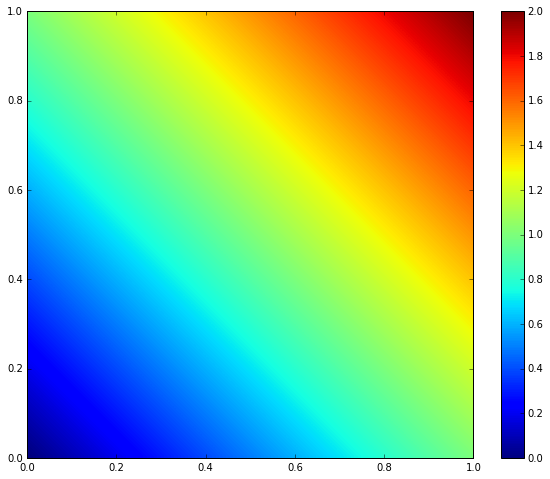

In [101]:

plt.figure(figsize=(10,10))

x=np.arange(0,1.01,0.01)
# y=x[::-1]
y=x
xx,yy=np.meshgrid(x,y)
zz=xx+yy
plt.imshow(zz, extent=(x[0],x[-1],y[0],y[-1]), origin='lower' )

plt.colorbar(shrink=0.8)
plt.show()

In [67]:
Alpha1 = np.linspace(0.1,1,10)
Alpha2 = np.linspace(0.1,1,10)
R = np.zeros((10,10))
meanDegree = 5
honestThreshold = 0.95
inspectionPeriod = 3
traceProb = 0.9
meanIncubation = 5
devIncubation = 2

for i in range(10):
    for j in range(10):
        alpha1 = Alpha1[i]
        alpha2 = Alpha2[j]
        _,_,_,_,_,_,_,r = readSJH_G(meanDegree, alpha1, alpha2, honestThreshold, inspectionPeriod, traceProb, meanIncubation, devIncubation)
        R[i][j] = r[-1]
    


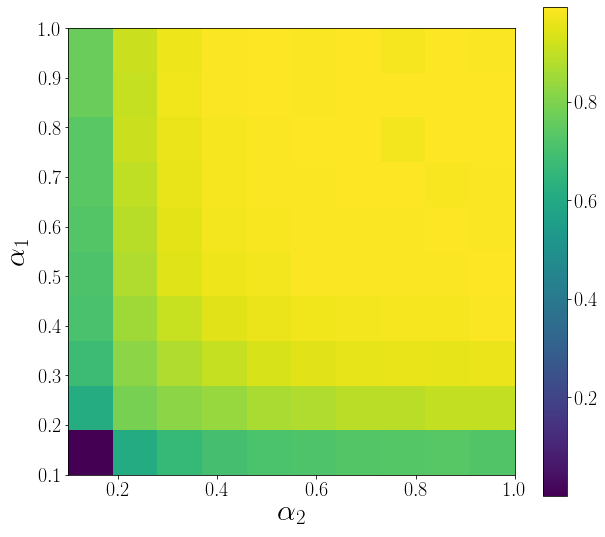

In [70]:
plt.figure(figsize = (10,10))

plt.imshow(R, origin = 'lower', extent = (Alpha1[0],Alpha1[-1],Alpha2[0],Alpha2[-1]))
plt.colorbar(shrink = 0.9)
plt.ylabel(r"$\alpha_1$")
plt.xlabel(r"$\alpha_2$")

plt.savefig("./figure/SWIR_G.pdf")
plt.show()

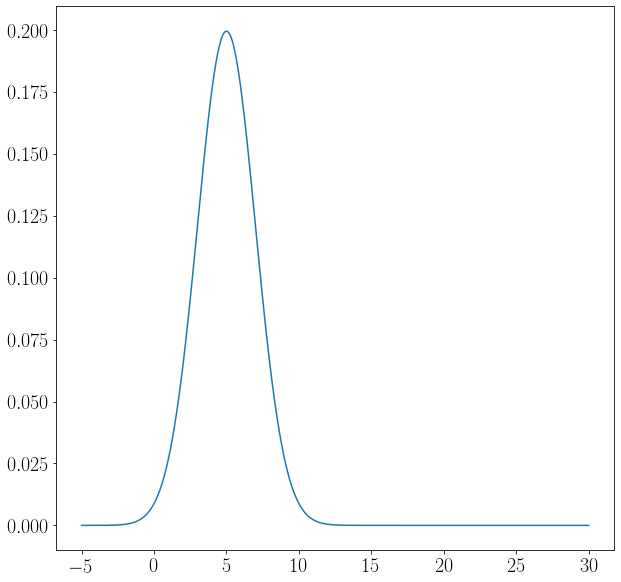

In [26]:
plt.figure(figsize = (10,10))

x= np.linspace(-5,30,1001)
mean = 5
std = 2
y = np.exp(-np.power(x-mean,2)/(2*std*std))/(std*np.sqrt(2*np.pi))

plt.plot(x,y)


plt.show()


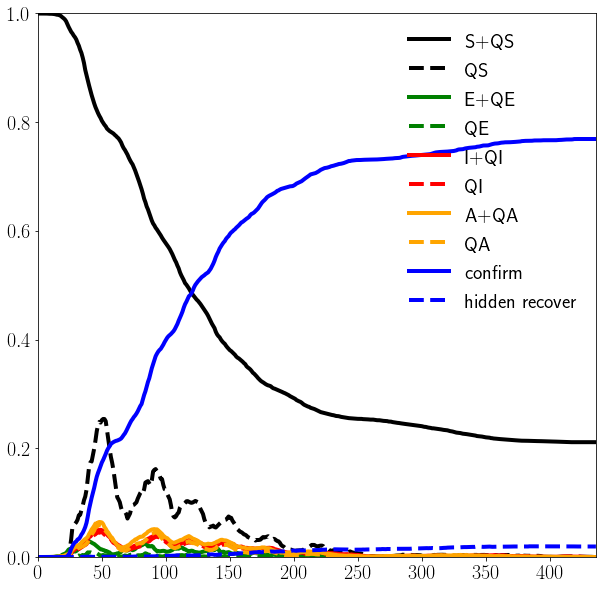

In [24]:
plt.figure(figsize = (10,10))

meanDegree = 10
alpha1 = 0.1
alpha2 = 0.6
infectious = 3.0
sick = 7.0
recovery = 12.0


S,QS,E,QE,I,QI,A,QA,R,QR = readKquarantine("ER_DT", meanDegree, alpha1, alpha2, infectious, sick, recovery)

t = np.arange(0,len(S),1)
plt.plot(t, S+QS, 'k-', label = 'S+QS', linewidth = 4)
plt.plot(t, QS, 'k--', label = 'QS', linewidth = 4)
plt.plot(t, E+QE, 'g-', label = 'E+QE', linewidth = 4)
plt.plot(t, QE, 'g--', label = 'QE', linewidth = 4)
plt.plot(t, I+QI, 'r-', label = 'I+QI', linewidth = 4)
plt.plot(t, QI, 'r--', label = 'QI', linewidth = 4)
plt.plot(t, A+QA, linestyle='-', color = 'orange', label = 'A+QA', linewidth = 4)
plt.plot(t, QA, linestyle='--', color = 'orange', label = 'QA', linewidth = 4)
plt.plot(t, QR+QI+QA, 'b-', label = 'confirm', linewidth = 4)
plt.plot(t, R, 'b--', label = 'hidden recover', linewidth = 4)



plt.xlim([t[0],t[-1]])
plt.ylim([0,0.1])
plt.ylim([0,1])
plt.legend(loc='upper right')

# plt.savefig("./figure/KQ8.pdf")
plt.show()

        

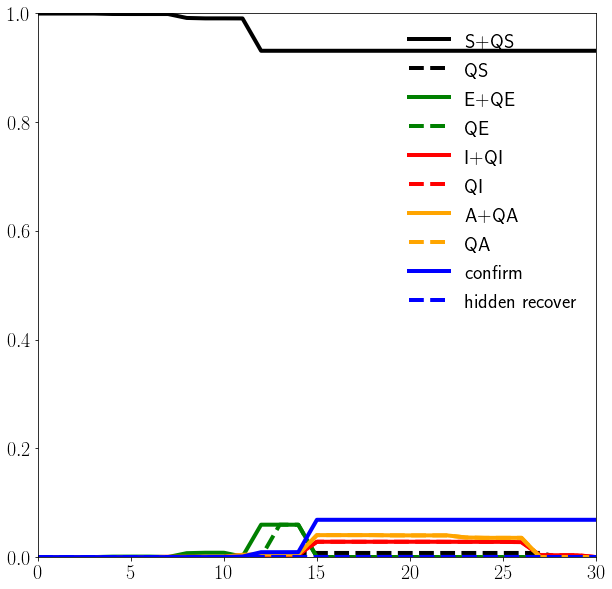

In [22]:
plt.figure(figsize = (10,10))

meanDegree = 10
alpha1 = 0.9
alpha2 = 0.6
infectious = 3.0
sick = 7.0
recovery = 12.0


S,QS,E,QE,I,QI,A,QA,R,QR = readKquarantine("ER_DT", meanDegree, alpha1, alpha2, infectious, sick, recovery)

t = np.arange(0,len(S),1)
plt.plot(t, S+QS, 'k-', label = 'S+QS', linewidth = 4)
plt.plot(t, QS, 'k--', label = 'QS', linewidth = 4)
plt.plot(t, E+QE, 'g-', label = 'E+QE', linewidth = 4)
plt.plot(t, QE, 'g--', label = 'QE', linewidth = 4)
plt.plot(t, I+QI, 'r-', label = 'I+QI', linewidth = 4)
plt.plot(t, QI, 'r--', label = 'QI', linewidth = 4)
plt.plot(t, A+QA, linestyle='-', color = 'orange', label = 'A+QA', linewidth = 4)
plt.plot(t, QA, linestyle='--', color = 'orange', label = 'QA', linewidth = 4)
plt.plot(t, QR+QI+QA, 'b-', label = 'confirm', linewidth = 4)
plt.plot(t, R, 'b--', label = 'hidden recover', linewidth = 4)



plt.xlim([t[0],t[-1]])
plt.ylim([0,0.1])
plt.ylim([0,1])
plt.legend(loc='upper right')

# plt.savefig("./figure/KQ8.pdf")
plt.show()

        

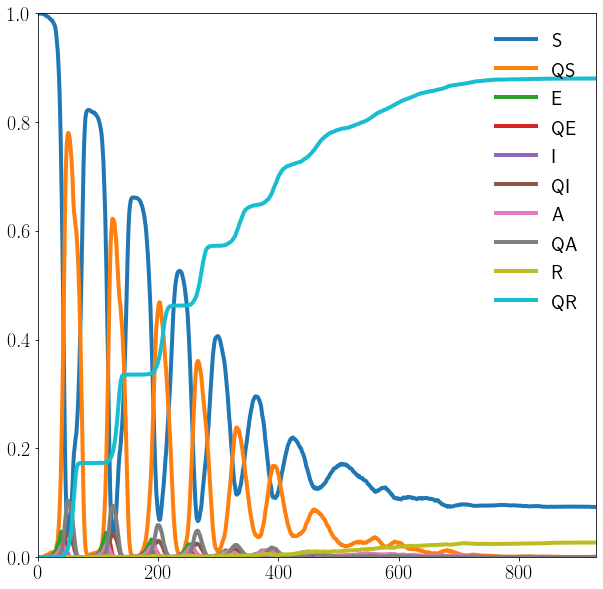

In [30]:
plt.figure(figsize = (10,10))

meanDegree = 10
alpha1 = 0.1
alpha2 = 0.7
infectious = 5.0
sick = 3.0
recovery = 15.0
temporalRatio = 0.3


S,QS,E,QE,I,QI,A,QA,R,QR = readTKquarantine("TER_DT", temporalRatio, meanDegree, alpha1, alpha2, infectious, sick, recovery)
t = np.arange(0,len(S),1)

plt.plot(t, S, label = 'S', linewidth = 4)
plt.plot(t, QS, label = 'QS', linewidth = 4)
plt.plot(t, E, label = 'E', linewidth = 4)
plt.plot(t, QE, label = 'QE', linewidth = 4)
plt.plot(t, I, label = 'I', linewidth = 4)
plt.plot(t, QI, label = 'QI', linewidth = 4)
plt.plot(t, A, label = 'A', linewidth = 4)
plt.plot(t, QA, label = 'QA', linewidth = 4)
plt.plot(t, R, label = 'R', linewidth = 4)
plt.plot(t, QR, label = 'QR', linewidth = 4)
# plt.plot(t, QI+QA+QR, label = 'confirm', linewidth = 4)



plt.xlim([t[0],t[-1]])
plt.ylim([0,1])
plt.legend(loc='upper right')

plt.savefig("./figure/KQ_T5.pdf")
plt.show()

        

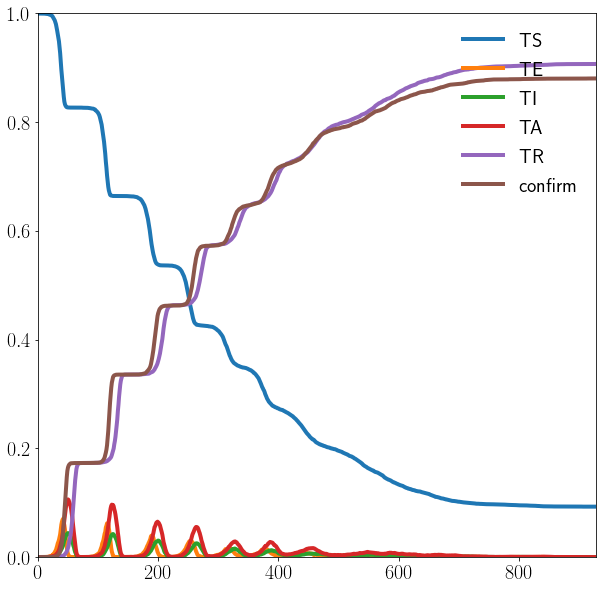

In [31]:
plt.figure(figsize = (10,10))

meanDegree = 10
alpha1 = 0.1
alpha2 = 0.7
infectious = 5.0
sick = 3.0
recovery = 15.0
temporalRatio  = 0.3

S,QS,E,QE,I,QI,A,QA,R,QR = readTKquarantine("TER_DT", temporalRatio, meanDegree, alpha1, alpha2, infectious, sick, recovery)
t = np.arange(0,len(S),1)

plt.plot(t, S+QS, label = 'TS', linewidth = 4)
plt.plot(t, E+QE, label = 'TE', linewidth = 4)
plt.plot(t, I+QI, label = 'TI', linewidth = 4)
plt.plot(t, A+QA, label = 'TA', linewidth = 4)
plt.plot(t, R+QR, label = 'TR', linewidth = 4)
plt.plot(t, QI+QA+QR, label = 'confirm', linewidth = 4)



plt.xlim([t[0],t[-1]])
plt.ylim([0,1])
plt.legend(loc='upper right')

plt.savefig("./figure/KQ_T6.pdf")
plt.show()

        

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

meanDegree = 10
alpha1 = 0.59
alpha2 = 0.63
infectiousA = 4.0
infectiousI = 7.0
sick = 7.0
recoveryA = 9.0
recoveryI = 12.0


S,QS,E,QE,I,QI,A,QA,R,QR,CR = readKquarantine2("ER_DT", meanDegree, alpha1, alpha2, infectiousA, infectiousI, sick, recoveryA, recoveryI)

t = np.arange(0,len(S),1)
plt.plot(t, S+QS, 'k-', label = 'S+QS', linewidth = 4)
plt.plot(t, QS, 'k--', label = 'QS', linewidth = 4)
plt.plot(t, E+QE, 'g-', label = 'E+QE', linewidth = 4)
plt.plot(t, QE, 'g--', label = 'QE', linewidth = 4)
plt.plot(t, I+QI, 'r-', label = 'I+QI', linewidth = 4)
plt.plot(t, QI, 'r--', label = 'QI', linewidth = 4)
plt.plot(t, A+QA, linestyle='-', color = 'orange', label = 'A+QA', linewidth = 4)
plt.plot(t, QA, linestyle='--', color = 'orange', label = 'QA', linewidth = 4)
plt.plot(t, CR+QI+QA, 'b-', label = 'confirm', linewidth = 4)
plt.plot(t, R+QR, 'b--', label = 'hidden recover', linewidth = 4)

plt.xlim([t[0],t[-1]])
# plt.xlim([0,70])
plt.ylim([0,0.2])
plt.ylim([0,1])
plt.legend(loc='upper right')



plt.subplot(1,2,2)
meanDegree = 10
alpha1 = 0.6

S,QS,E,QE,I,QI,A,QA,R,QR,CR = readKquarantine2("ER_DT", meanDegree, alpha1, alpha2, infectiousA, infectiousI, sick, recoveryA, recoveryI)

t = np.arange(0,len(S),1)
plt.plot(t, S+QS, 'k-', label = 'S+QS', linewidth = 4)
plt.plot(t, QS, 'k--', label = 'QS', linewidth = 4)
plt.plot(t, E+QE, 'g-', label = 'E+QE', linewidth = 4)
plt.plot(t, QE, 'g--', label = 'QE', linewidth = 4)
plt.plot(t, I+QI, 'r-', label = 'I+QI', linewidth = 4)
plt.plot(t, QI, 'r--', label = 'QI', linewidth = 4)
plt.plot(t, A+QA, linestyle='-', color = 'orange', label = 'A+QA', linewidth = 4)
plt.plot(t, QA, linestyle='--', color = 'orange', label = 'QA', linewidth = 4)
plt.plot(t, CR+QI+QA, 'b-', label = 'confirm', linewidth = 4)
plt.plot(t, R+QR, 'b--', label = 'hidden recover', linewidth = 4)

plt.xlim([t[0],t[-1]])
plt.xlim([10,100])
plt.ylim([0,1])
plt.legend(loc='upper right')



# plt.savefig("./figure/KQ12.pdf")
plt.show()

        

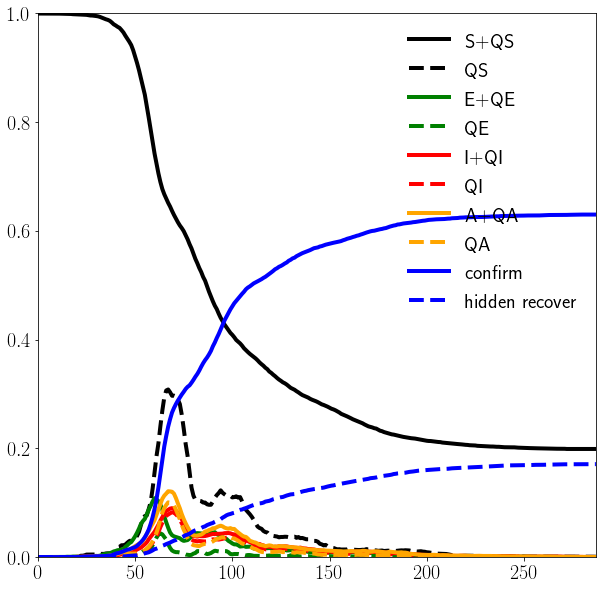

In [10]:
plt.figure(figsize = (10,10))

meanDegree = 10
alpha1 = 0.09
alpha2 = 0.63
infectiousA = 5.0
infectiousI = 5.0
sick = 7.0
recoveryA = 10.0
recoveryI = 10.0


S,QS,E,QE,I,QI,A,QA,R,QR,CR = readKquarantine2("ER_DT", meanDegree, alpha1, alpha2, infectiousA, infectiousI, sick, recoveryA, recoveryI)

t = np.arange(0,len(S),1)
plt.plot(t, S+QS, 'k-', label = 'S+QS', linewidth = 4)
plt.plot(t, QS, 'k--', label = 'QS', linewidth = 4)
plt.plot(t, E+QE, 'g-', label = 'E+QE', linewidth = 4)
plt.plot(t, QE, 'g--', label = 'QE', linewidth = 4)
plt.plot(t, I+QI, 'r-', label = 'I+QI', linewidth = 4)
plt.plot(t, QI, 'r--', label = 'QI', linewidth = 4)
plt.plot(t, A+QA, linestyle='-', color = 'orange', label = 'A+QA', linewidth = 4)
plt.plot(t, QA, linestyle='--', color = 'orange', label = 'QA', linewidth = 4)
plt.plot(t, CR+QI+QA, 'b-', label = 'confirm', linewidth = 4)
plt.plot(t, R+QR, 'b--', label = 'hidden recover', linewidth = 4)



plt.xlim([t[0],t[-1]])
plt.ylim([0,0.1])
plt.ylim([0,1])
plt.legend(loc='upper right')

# plt.savefig("./figure/KQ12.pdf")
plt.show()

        

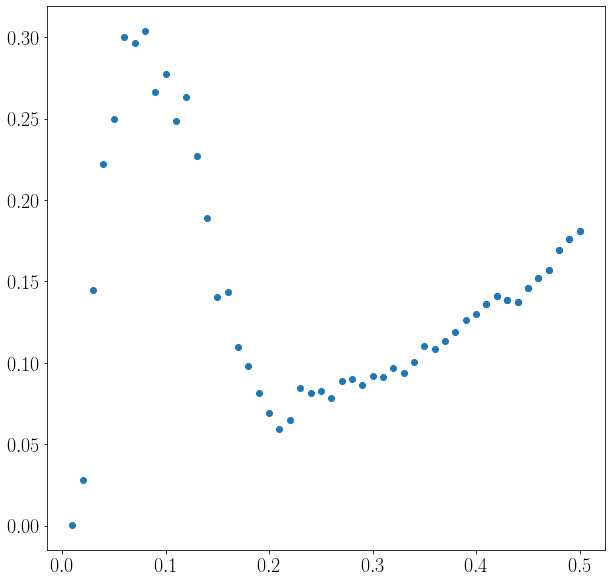

In [63]:
plt.figure(figsize = (10,10))



alpha1, meanR = read()
plt.plot(alpha1, meanR, 'o')



plt.show()

        

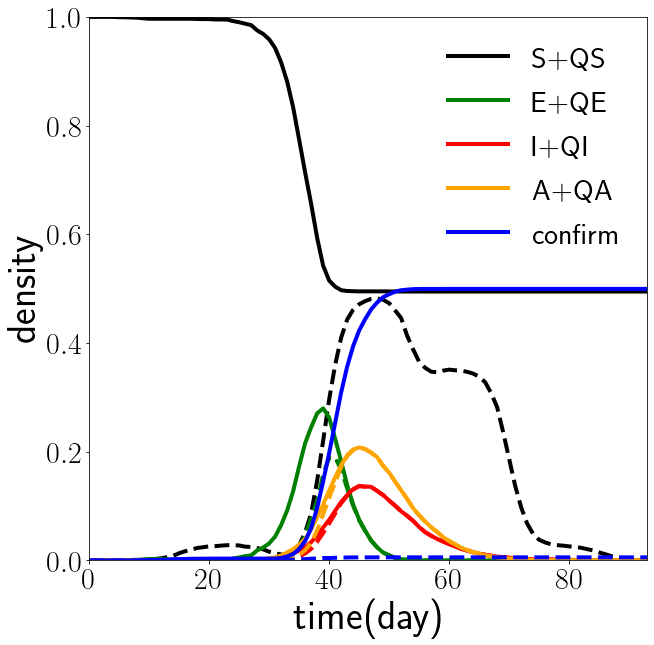

In [69]:
plt.figure(figsize = (10,10))

networkSize = 10000
meanDegree = 10
ARatio = 0.63
infectious = 5.0
sick = 7.0
recovery = 10.0

infectiousProb = 0.6
quarantineProb = 0.6
randomSeed = 57

S,QS,E,QE,I,QI,A,QA,R,QR,CR = readKquarantine0("ER_DT", infectiousProb, quarantineProb, randomEngineSeed = randomSeed)

t = np.arange(0,len(S),1)
plt.plot(t, S+QS, 'k-', label = 'S+QS', linewidth = 4)
plt.plot(t, QS, 'k--', linewidth = 4)
plt.plot(t, E+QE, 'g-', label = 'E+QE', linewidth = 4)
plt.plot(t, QE, 'g--', linewidth = 4)
plt.plot(t, I+QI, 'r-', label = 'I+QI', linewidth = 4)
plt.plot(t, QI, 'r--', linewidth = 4)
plt.plot(t, A+QA, linestyle='-', color = 'orange', label = 'A+QA', linewidth = 4)
plt.plot(t, QA, linestyle='--', color = 'orange', linewidth = 4)
plt.plot(t, CR+QI+QA, 'b-', label = 'confirm', linewidth = 4)
plt.plot(t, R+QR, 'b--', linewidth = 4)



plt.xlim([t[0],t[-1]])
plt.ylim([0,0.1])
plt.ylim([0,1])
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("time(day)", fontsize = 40)
plt.ylabel("density", fontsize = 40)
plt.legend(loc='upper right', prop={'size': 30})

plt.savefig("./figure/KQ(ER_DT)IF{:.2f}".format(infectiousProb)+",QP{:.2f}".format(quarantineProb)+",S"+str(randomSeed)+".pdf")
plt.show()

        

In [69]:
R = readKQOrderParameter()


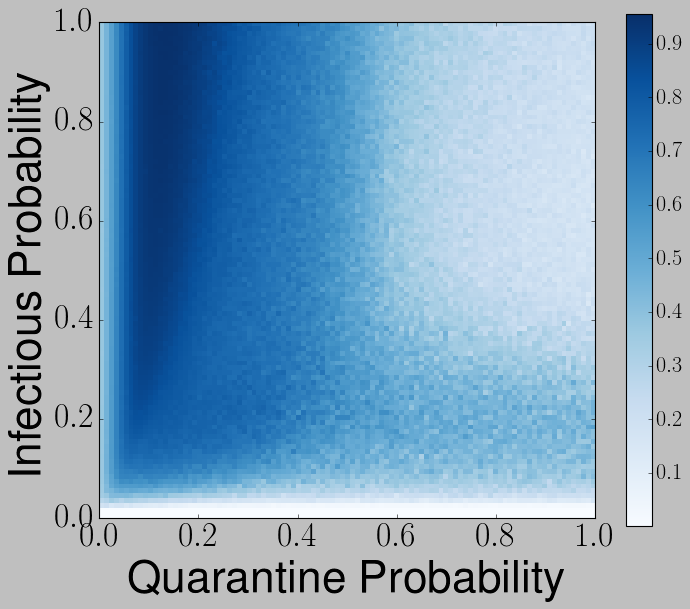

In [86]:
plt.figure(figsize = (10,10))
 

plt.imshow(R, origin = 'lower', extent = (0,1,0,1), cmap = 'Blues', interpolation = 'nearest')
plt.colorbar(shrink = 0.8)
plt.ylabel("Infectious Probability", fontsize = 40)
plt.xlabel("Quarantine Probability", fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

plt.savefig("./figure/KQ(ER_DT)OrderParameter.pdf")
plt.show()

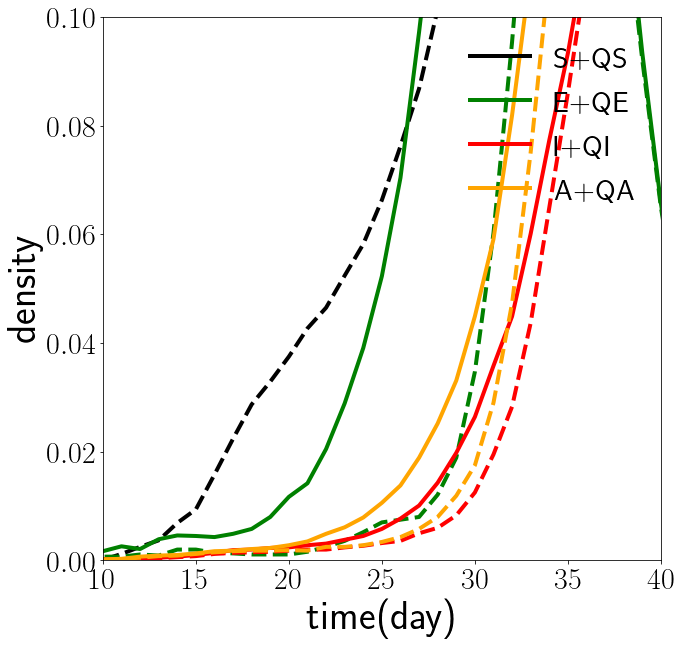

In [52]:
plt.figure(figsize = (10,10))

networkSize = 10000
meanDegree = 10
ARatio = 0.63
infectious = 5.0
sick = 7.0
recovery = 10.0

infectiousProb = 0.6
quarantineProb = 0.6
temporal = 0.05
randomSeed = 13

S,QS,E,QE,I,QI,A,QA,R,QR,CR = readKquarantine0("ER_DT", infectiousProb, quarantineProb, temporal, randomSeed)

t = np.arange(0,len(S),1)
plt.plot(t, S+QS, 'k-', label = 'S+QS', linewidth = 4)
plt.plot(t, QS, 'k--', linewidth = 4)
plt.plot(t, E+QE, 'g-', label = 'E+QE', linewidth = 4)
plt.plot(t, QE, 'g--', linewidth = 4)
plt.plot(t, I+QI, 'r-', label = 'I+QI', linewidth = 4)
plt.plot(t, QI, 'r--', linewidth = 4)
plt.plot(t, A+QA, linestyle='-', color = 'orange', label = 'A+QA', linewidth = 4)
plt.plot(t, QA, linestyle='--', color = 'orange', linewidth = 4)
# plt.plot(t, CR+QI+QA, 'b-', label = 'confirm', linewidth = 4)
# plt.plot(t, R+QR, 'b--', linewidth = 4)



plt.xlim([t[0],t[-1]])
# plt.ylim([0,1])
plt.xlim([10,40])
plt.ylim([0,0.1])
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("time(day)", fontsize = 40)
plt.ylabel("density", fontsize = 40)
plt.legend(loc='upper right', prop={'size': 30})

# plt.savefig("./figure/KQ(TER_DT)IF{:.2f}".format(infectiousProb)+",QP{:.2f}".format(quarantineProb)+",T{:.2f}".format(temporal)+",S"+str(randomSeed)+".pdf")
plt.show()

        

In [4]:
temporal = 0.05
temporal = 0
R = readKQOrderParameter(temporal)


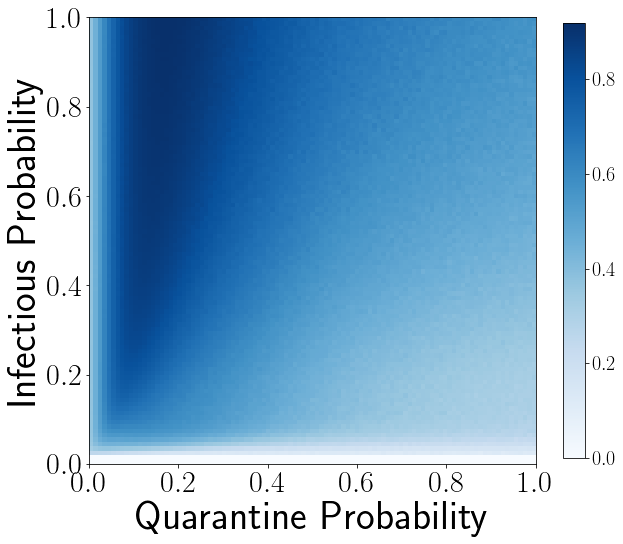

In [6]:
plt.figure(figsize = (10,10))
 

plt.imshow(R, origin = 'lower', extent = (0,1,0,1), cmap = 'Blues', interpolation = 'nearest')
plt.colorbar(shrink = 0.8)
plt.ylabel("Infectious Probability", fontsize = 40)
plt.xlabel("Quarantine Probability", fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

plt.savefig("./figure/KQ(ER_DT)OrderParameter1.pdf")
plt.show()

In [80]:
def linearFittingLog(x,y,xStart=0,xEnd=0,offset=0):
    p,residual,_,_,_=np.polyfit(np.log10(x),np.log10(y),1,full=True)
    if xStart==0:
        xStart=x[0]
    if xEnd==0:
        xEnd=x[-1]
    xLinear=np.array([xStart, xEnd])
    yLinear=np.zeros(2)
    yLinear=np.power(10,p[1]-offset)*np.power(xLinear,p[0])
    return p[0], residual, xLinear, yLinear

def read():
    filename = "../playground/a.txt"
    degree = []
    count = []
    with open(filename) as file:
        for line in csv.reader(file):
            if (float(line[0])!=0):
                degree.append(float(line[0]))
                count.append(float(line[1]))
            
    return np.array(degree), np.array(count)

-3.0356488545346374


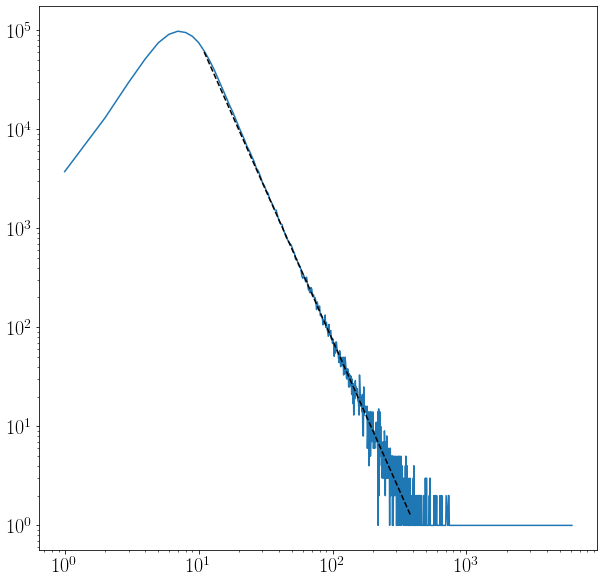

In [89]:
plt.figure(figsize=(10,10))

degree, count = read()

tilt,_,xLinear,yLinear = linearFittingLog(degree[10:-200], count[10:-200])
print(tilt)
plt.plot(degree, count)
plt.plot(xLinear,yLinear,'k--')
# plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [18]:
def logFit(x, y, xStart=0.0, xEnd=0.0, offset=0.0):
    fitX = np.zeros(2)
    if xStart==0.0 and xEnd==0.0:
        fitX[0] = x[0]
        fitX[1] = x[-1]
    else:
        fitX[0] = xStart
        fitX[1] = xEnd
    poly, residual, _, _, _ = np.polyfit(np.log10(x), np.log10(y), 1, full=True)
    fitY = np.power(10.0, poly[1]-offset)*np.power(fitX, poly[0])
    return fitX, fitY, poly[0], residual

deg = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,74]

dist = [30616,94722,150264,166766,147480,114104,81015,55138,37687,26317,18749,14159,10418,7931,6465,5259,4274,3645,2945,2560,2146,1784,1626,1433,1216,1068,989,904,772,660,627,609,525,447,442,406,366,320,308,305,254,287,223,193,164,183,171,155,126,104,118,99,61,73,67,53,43,34,26,20,15,15,12,12,3,1,8,5,4,1,2,1]

-3.085699268437653


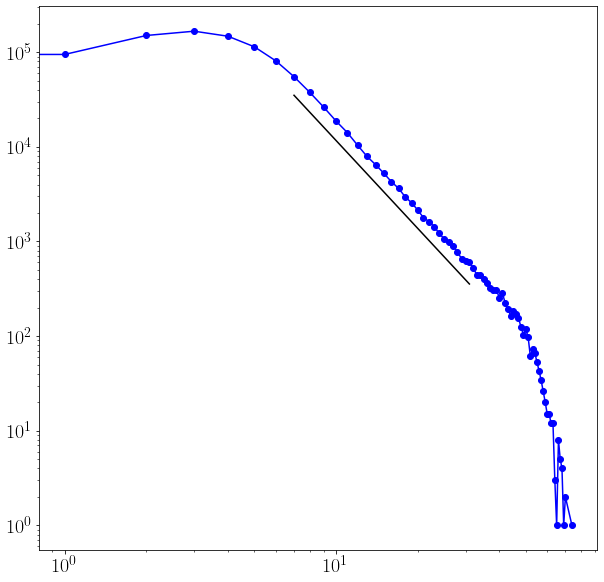

In [22]:
_ ,ax = plt.subplots(figsize=(10,10))

ax.plot(deg, dist, 'bo-')
x,y,beta,_ = logFit(deg[7:-40], dist[7:-40], offset=0.2)
ax.plot(x,y, 'k-')
print(beta)

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()